# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
import main

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 

***Wnioski:***

W zadaniu pierwszym zaimplementowałam funkcję *solve_euler*, służącą do rozwiązywania problemu poczatkowego dla równań różniczkowych zwyczajnych. Uwzględniłam przy tym funkcjonalność zarówno w przypadku pojedynczych równań, jak i układów równań.


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


Text(0.5, 0.98, 'Rozwiązanie równania metodą Eulera dla różnych wartości h')

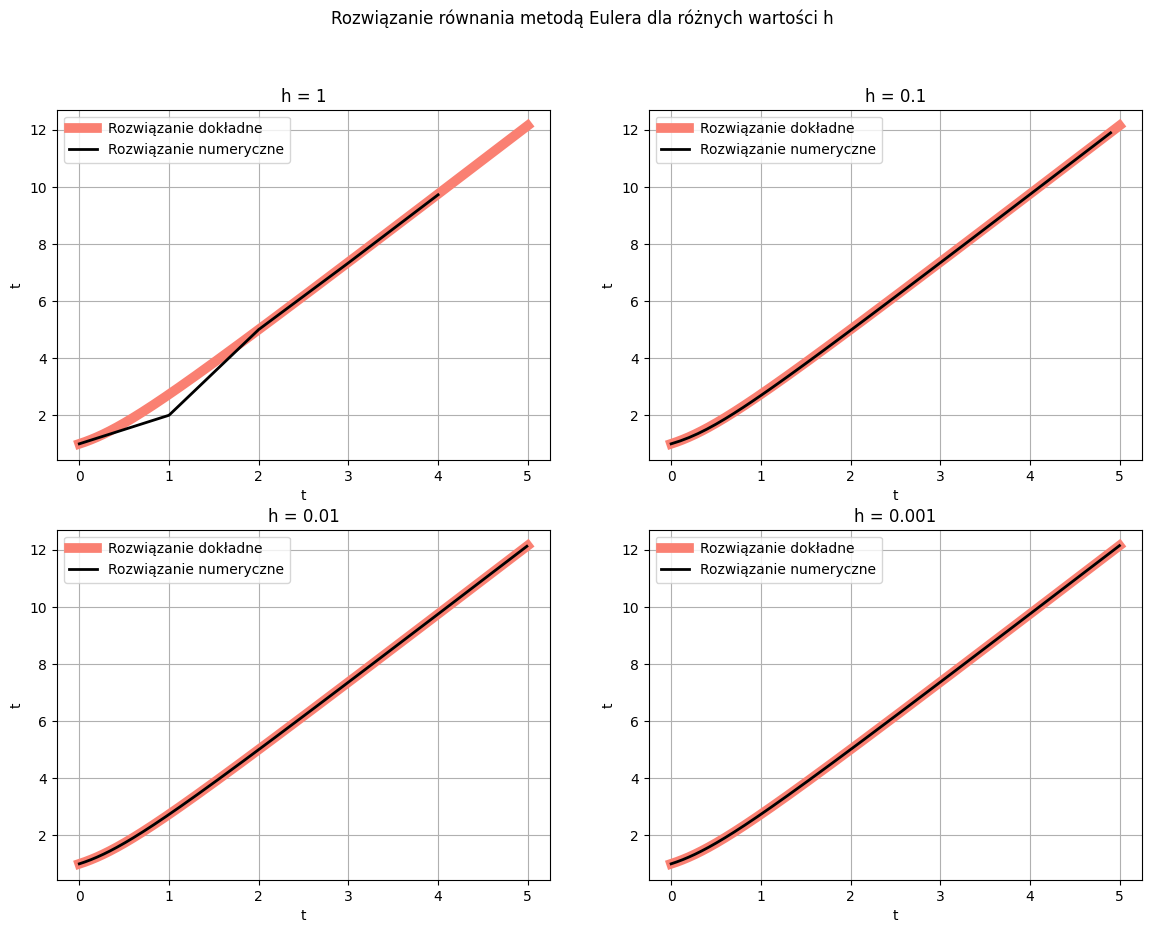

In [2]:

f = lambda x, t: (x+t)/(x-t)
f_sol = lambda t: t + np.sqrt(1 + 2*t**2)
t_prec = np.arange(0,5, 0.001 )
x0 = 1

hs = [1, 0.1, 0.01, 0.001]
_, ax = plt.subplots(2, 2, figsize = (14, 10))
for i in range(2):
    for j in range(2):
        h = hs[2*i+j]
        t = np.arange(0, 5, h)
        ax_curr = ax[i, j]
        ax_curr.plot(t_prec, f_sol(t_prec), linewidth= 7, color='salmon', label='Rozwiązanie dokładne')
        ax_curr.plot(t, main.solve_euler(f, t, x0, h), linewidth = 2, color='black', label= 'Rozwiązanie numeryczne')
        ax_curr.grid()
        ax_curr.legend()
        ax_curr.set(xlabel= 't', ylabel= 't', title= 'h = {0}'.format(h))
plt.suptitle('Rozwiązanie równania metodą Eulera dla różnych wartości h')



***Wnioski:***

W zadaniu rozwiązałam równanie o zadanym warunku początkowym z wykorzystaniem wcześniej zaimplementowanej funkcji *solve_euler*. Porównałam jej dokładność w zależności od wartości *h* stanowiącej krok różniczkowania w metodzie Eulera. W tym celu, oprócz samych rozwiązań numerycznych, na wykresie umieściłam również wykres rozwiązania dokładnego, które zostało podane w treści zadania. 

Wyniki potwierdziły, że dokładność otrzymanych wyników rośnie wraz ze zmniejszeniem wartości *h*.

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Rozwiązanie równania metodą Eulera dla różnych wartości h')

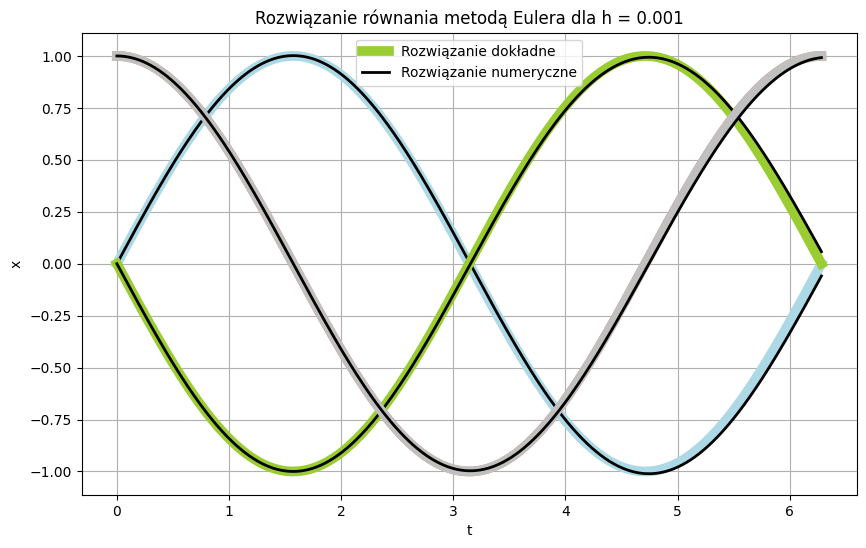

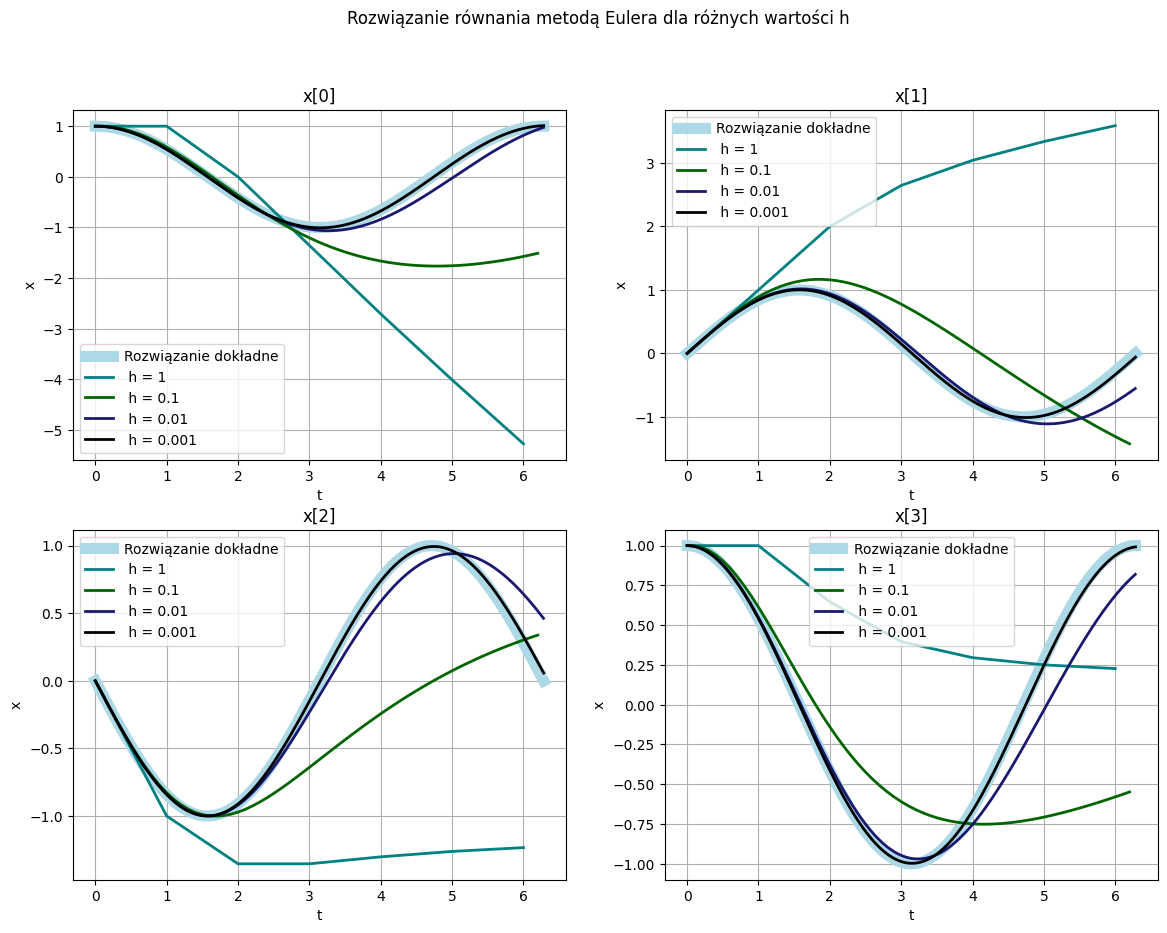

In [3]:

hs = [1, 0.1, 0.01, 0.001]
t_prec = np.arange(0, 2 * np.pi, 0.001)
x0 = np.array([1, 0, 0, 1])
colors = ['salmon', 'lightblue', 'yellowgreen', 'silver']
labels1 = [ None, None, 'Rozwiązanie numeryczne', None]
labels2 = [ None, None, 'Rozwiązanie dokładne', None]

f = lambda x, t: np.array([x[2], x[3], -x[0]/(x[0]**2+x[1]**2)**1.5, -x[1]/(x[0]**2+x[1]**2)**1.5])
f_sol = lambda t : np.array([np.cos(t), np.sin(t), -np.sin(t), np.cos(t)])

_, ax = plt.subplots(figsize= (10, 6))
ax.grid()
ax.set(xlabel='t', ylabel='x', title='Rozwiązanie równania metodą Eulera dla h = 0.001')
for i in range(4):   
    ax.plot(t_prec, f_sol(t_prec)[i, :], linewidth= 7, color=colors[i], label=labels2[i]) 
    ax.plot(t_prec, main.solve_euler(f, t_prec, x0, 0.001)[:, i], linewidth = 2, color='black', label= labels1[i])    
    ax.legend(loc='upper center')   


colors = [ 'teal', 'darkgreen','midnightblue',  'black']
_, ax = plt.subplots(2, 2, figsize = (14, 10))
for i in range(2):
    for j in range(2):
        ax_curr = ax[i, j] 
        ax_curr.plot(t_prec, f_sol(t_prec)[2*i+j, :], linewidth= 8, color= 'lightblue', label= 'Rozwiązanie dokładne')
        ax_curr.grid() 
        
        ax_curr.set(xlabel= 't', ylabel= 'x', title= 'x[{0}]'.format(2*i + j))
        for idx, h in enumerate(hs):              
            t = np.arange(0, 2 * np.pi, h)    
            solution = main.solve_euler(f, t, x0, h)             
            ax_curr.plot(t, solution[:, 2*i+j], linewidth= 2, color= colors[idx], label= ' h = {0}'.format(h)) 
            ax_curr.legend()        
            
            
plt.suptitle('Rozwiązanie równania metodą Eulera dla różnych wartości h')






***Wnioski:***

W zadaniu trzecim naszym celem było rozwiązanie układu równań różniczkowych, także za pomocą metody Eulera. Otrzymane wyniki były bardzo bliskie dokładnego rozwiązania dla kroku *h = 0.001*. 

Na osobnym wykresie przedstawiłam kolejne współrzędne uzyskanego rozwiązania dla różnych wartości *h*. Dla kroków mniejszych od 0.01, otrzymane wyniki zdecydowanie odbiegały od dokładnego rozwiązania.

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Pc\AppData\Local\Temp\ipykernel_280\1051777567.py:10: RuntimeWarning: overflow encountered in matmul
  f = lambda x, t: A@x
c:\Users\Pc\Documents\AGH\3semestr\metody_numeryczne\laboratoria\laboratorium-12-iwyderka24\main.py:31: RuntimeWarning: invalid value encountered in add
  y[i, :] = y[i-1, :] + h * fun(y[i-1,:], t_span[i-1])


Text(0.5, 0.98, 'Rozwiązanie równania metodą Eulera dla różnych wartości h')

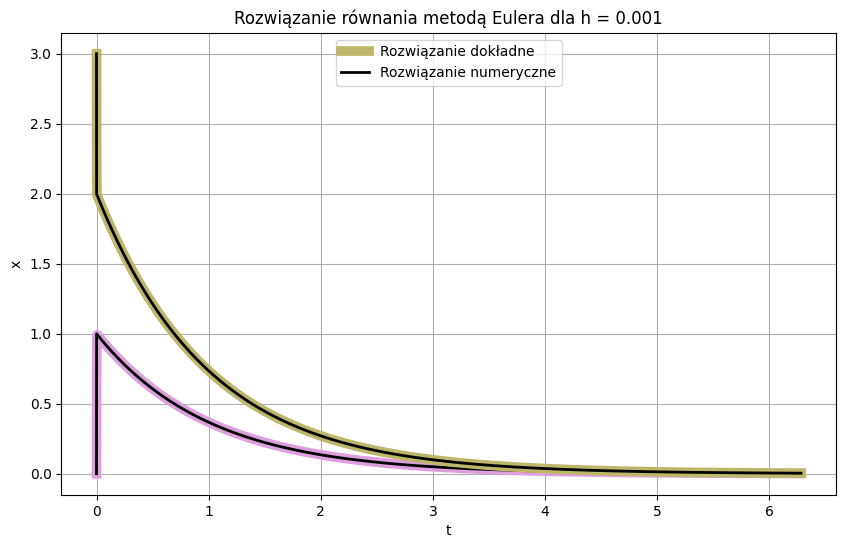

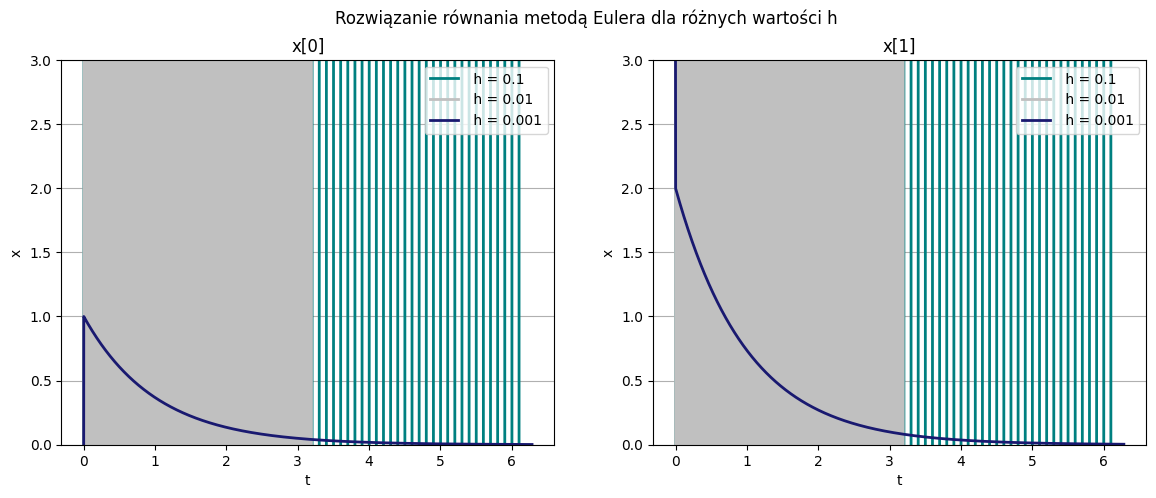

In [4]:
hs = [0.1, 0.01, 0.001]
t_prec = np.arange(0, 2 * np.pi, 0.001)

x0 = np.array([0, 3])
A = np.array([[-667, 333], [666, -334]])
colors = ['plum', 'darkkhaki']
labels1 = [None, 'Rozwiązanie numeryczne']
labels2 = [ None, 'Rozwiązanie dokładne']

f = lambda x, t: A@x
f_sol = lambda t : np.array([np.exp(-t)-np.exp(-1000*t), 2*np.exp(-t)+np.exp(-1000*t) ])

_, ax = plt.subplots(figsize= (10, 6))
ax.grid()
ax.set(xlabel='t', ylabel='x', title='Rozwiązanie równania metodą Eulera dla h = 0.001')
for i in range(2):   
    ax.plot(t_prec, f_sol(t_prec)[i, :], linewidth= 7, color=colors[i], label=labels2[i]) 
    ax.plot(t_prec, main.solve_euler(f, t_prec, x0, 0.001)[:, i], linewidth = 2, color='black', label=labels1[i])    
    ax.legend(loc='upper center')   


colors = [ 'teal', 'silver','midnightblue',  'black']
_, ax = plt.subplots(1, 2, figsize = (14, 5))
for i in range(2):    
    ax_curr = ax[i] 
    ax_curr.grid()     
    ax_curr.set(xlabel= 't', ylabel= 'x', title= 'x[{0}]'.format(i))
    ax_curr.set_ylim(0, 3)
    for idx, h in enumerate(hs):              
        t = np.arange(0, 2 * np.pi, h)    
        solution = main.solve_euler(f, t, x0, h)             
        ax_curr.plot(t, solution[:, i], linewidth= 2, color= colors[idx], label= ' h = {0}'.format(h)) 
        ax_curr.legend()     
        
            
plt.suptitle('Rozwiązanie równania metodą Eulera dla różnych wartości h')



***Wnioski:***

W kolejnym zadaniu rozwiązałam układ równań w postaci macierzowej. Dokładne rozwiązanie równania ma postać:
$$
x(t)=\left[\begin{matrix}
e^{-t}-e^{-1000t}\\
2e^{-t}+e^{-1000t}\\
\end{matrix}\right].
$$ 
Rozwiązanie zbliżone do rozwiązania dokładnego uzyskałam dla *h = 0.001*. Większe wartości kroku skutkowały bardzo dużymi błędami.

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

Text(0.5, 0.98, 'Współrzędne trzeciego ciała dla różnych wartości h')

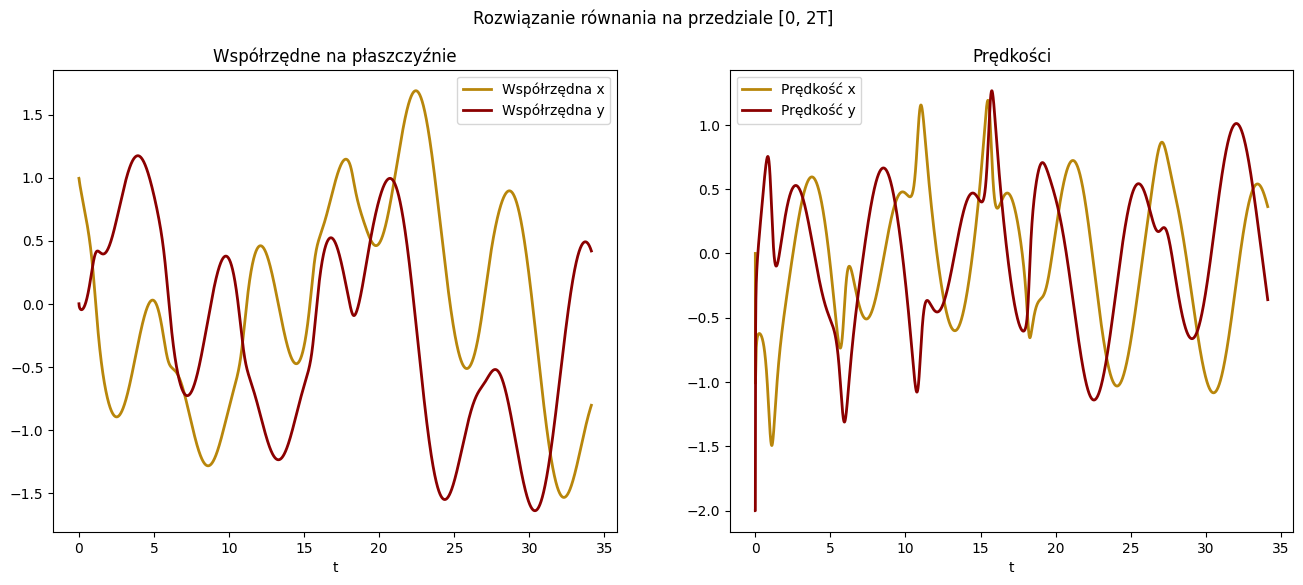

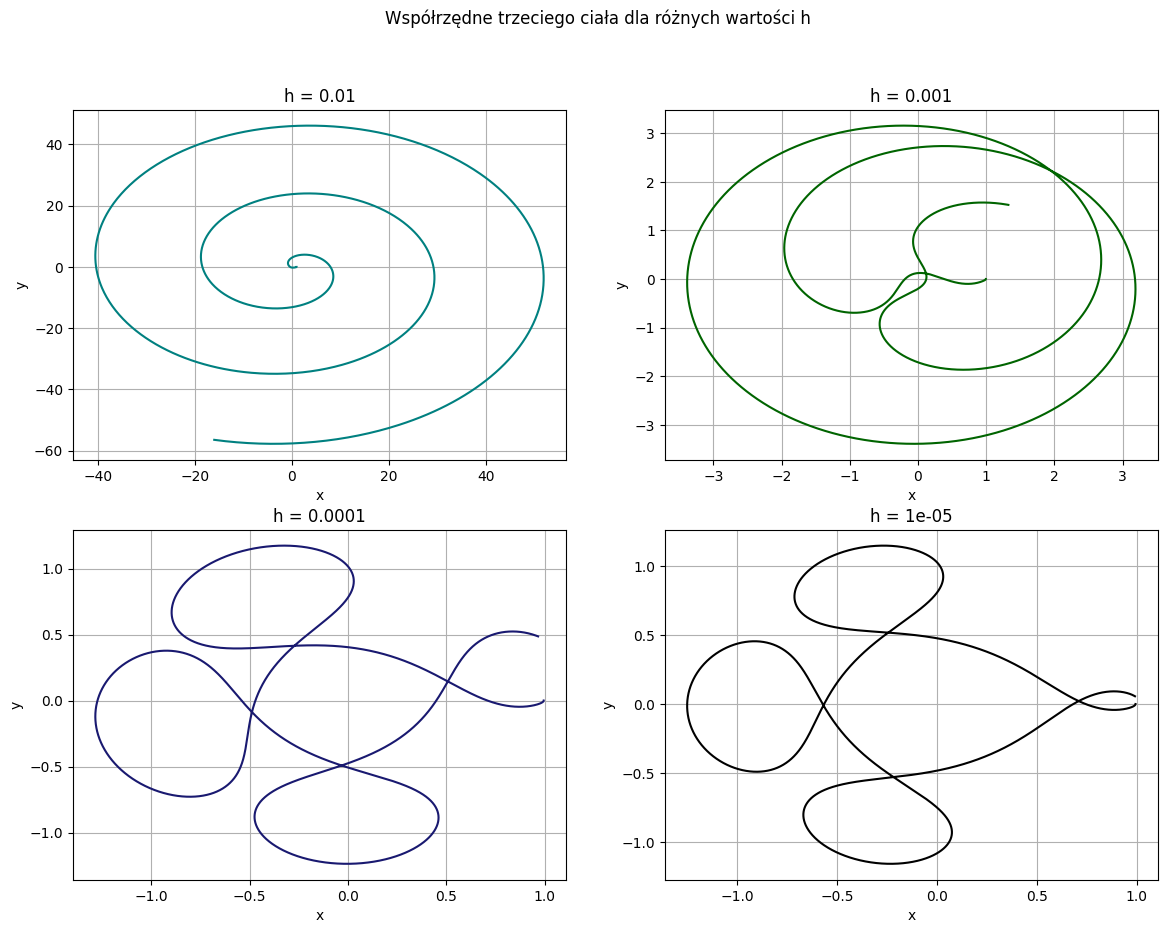

In [5]:

hs = [0.01, 0.001, 0.0001, 0.00001]
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
mikro = 0.012277471
h = 0.0001
T = 17.0652165601579625588917206249
t_prec = np.arange(0,2*T, h)
colors = ['darkgoldenrod', 'darkred']
labels1 = ['Współrzędna x', 'Współrzędna y']
labels2 = ['Prędkość x', 'Prędkość y']

f = lambda x, t: np.array([
        x[1], 
        x[0] + 2*x[3] - (1-mikro)*(x[0]+mikro)/((x[0]+mikro)**2 + x[2]**2)**1.5 - (mikro)*(x[0]-(1-mikro))/((x[0]-(1-mikro))**2 + x[2]**2)**1.5,
        x[3],
        x[2] - 2*x[1] - (1-mikro)*(x[2])/((x[0]+mikro)**2 + x[2]**2)**1.5 - (mikro)*(x[2])/((x[0]-(1-mikro))**2 + x[2]**2)**1.5
        ])

_, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 6))
ax1.set(xlabel='t', title='Współrzędne na płaszczyźnie')
for i in range(2):   
    ax1.plot(t_prec, main.solve_euler(f, t_prec, x0, h)[:, 2*i], linewidth = 2, color=colors[i], label= labels1[i])
    ax1.legend()     

ax2.set(xlabel='t', title='Prędkości')
for i in range(2):     
    ax2.plot(t_prec, main.solve_euler(f, t_prec, x0, h)[:, 2*i + 1], linewidth = 2, color=colors[i], label= labels2[i])   
    ax2.legend() 
plt.suptitle('Rozwiązanie równania na przedziale [0, 2T]')


colors = [ 'teal', 'darkgreen','midnightblue',  'black']
_, ax = plt.subplots(2, 2, figsize = (14, 10))
for i in range(2):
    for j in range(2):
        h = hs[2*i+j]
        ax_curr = ax[i, j]         
        ax_curr.grid()         
        ax_curr.set(xlabel= 'x', ylabel= 'y', title= 'h = {0}'.format(h))                    
        t = np.arange(0,  T, h)    
        solution = main.solve_euler(f, t, x0, h)             
        ax_curr.plot(solution[:,0],solution[:, 2], color= colors[2*i+j])                 
plt.suptitle('Współrzędne trzeciego ciała dla różnych wartości h')



***Wnioski:***

W ostatnim zadaniu zapoznałam się z orbitą Arenstorfa. Jest to przykład z astronomii, który można opisać za pomocą układu czterech równań różniczkowych. 

Opisany układ z zadanymi warunkami początkowymi rozwiązałam z wykorzystaniem metody Eulera. Dokładne rozwiązanie równań jest okresowe, jednakże w przypadku skorzystania z funkcji *solve_euler*, okresowości nie udało się pokazać nawet dla kroku *h =* ${10}^{-5}$. Przy takiej wartości *h*, obliczenia wymagają dużej ilości czasu, co jest odczuwalne podczas wykonywania programu.

Pierwsza i trzecia współrzędna rozwiązania odpowiadają za współrzędne trzeciego ciała na płaszczyźnie. Porównałam tor jego poruszania się dla różnych wartości *h*. Dopiero dla dokładności *h = 0.0001* otrzymany rezultat jest widocznie zbliżony do oczekiwanego.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
